# **TASK 3**

In [ ]:
!pip install dtw

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import t
from sklearn.decomposition import PCA
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from dtw import dtw  # Install the 'dtw' module using pip
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
# Read the data
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
test_labels = pd.read_csv("test_label.csv")

# **PCA**

In [ ]:
# Task 1: Principal Component Analysis (PCA)
def anomaly_detection_pca(train_data, test_data):
    # Handle NaN values by imputing or dropping them
    train_data.dropna(inplace=True)
    test_data.dropna(inplace=True)

    # Apply PCA
    pca = PCA(n_components=2)  # You can adjust the number of components
    pca.fit(train_data)
    train_pca = pca.transform(train_data)
    test_pca = pca.transform(test_data)
    return train_pca, test_pca

In [ ]:
# Perform anomaly detection for each task
train_pca, test_pca = anomaly_detection_pca(train_data, test_data)

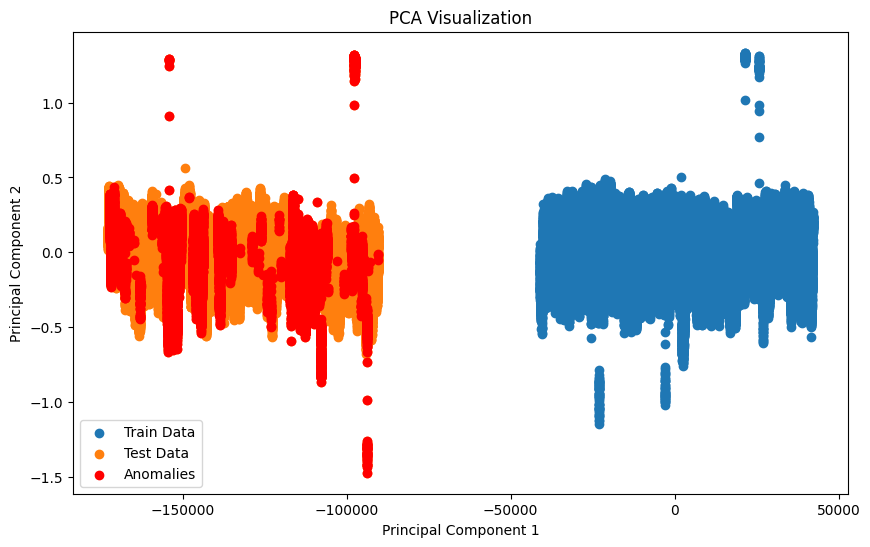

In [ ]:
# Visualize the PCA results
plt.figure(figsize=(10, 6))
plt.scatter(train_pca[:, 0], train_pca[:, 1], label='Train Data')
plt.scatter(test_pca[:, 0], test_pca[:, 1], label='Test Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization')
plt.legend()

# Highlight anomalies in the test data
anomaly_indices = test_labels[test_labels['label'] == 1].index
valid_indices = anomaly_indices[anomaly_indices < len(test_pca)]
plt.scatter(test_pca[valid_indices, 0], test_pca[valid_indices, 1], color='red', label='Anomalies')
plt.legend()

plt.show()

# **One-Class SVM**

In [ ]:
# Task 2: One-Class SVM
def anomaly_detection_oneclasssvm(train_data, test_data):
    # Reshape the data to 2D if it's 1D
    if len(train_data.shape) == 1:
        train_data = train_data.reshape(-1, 1)
    if len(test_data.shape) == 1:
        test_data = test_data.reshape(-1, 1)

    svm = OneClassSVM()
    svm.fit(train_data)
    test_pred = svm.predict(test_data)
    return test_pred

In [ ]:
test_pred_svm = anomaly_detection_oneclasssvm(train_data, test_data)

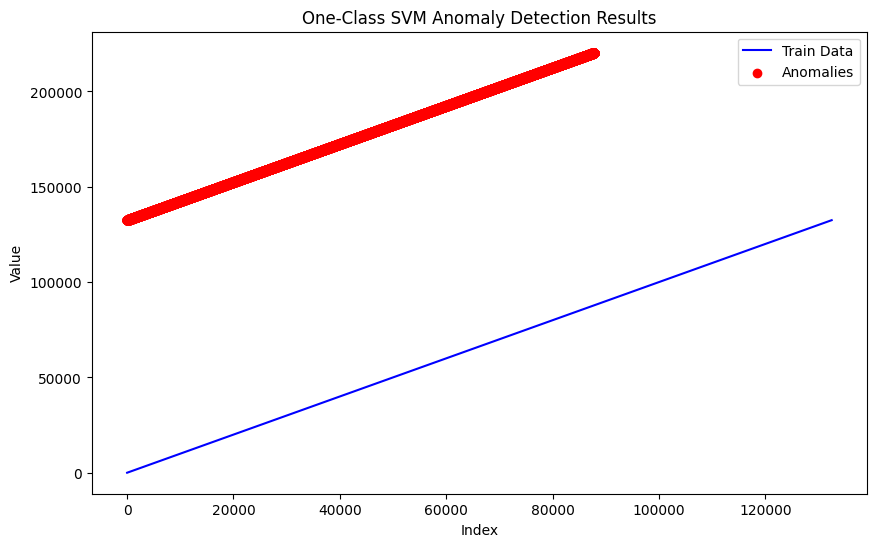

In [ ]:
# Visualize the results of One-Class SVM anomaly detection
plt.figure(figsize=(10, 6))

# Plot train data
plt.plot(train_data, label='Train Data', color='blue')

# Highlight anomalies in test data
anomalies_indices = [i for i, pred in enumerate(test_pred_svm) if pred == -1]
anomalies_values = [test_data[i] for i in anomalies_indices]
plt.scatter(anomalies_indices, anomalies_values, color='red', label='Anomalies')

plt.xlabel('Index')
plt.ylabel('Value')
plt.title('One-Class SVM Anomaly Detection Results')
plt.legend()
plt.show()

# **Isolation Forest**

In [ ]:
# Task 3: Isolation Forest
def anomaly_detection_isolationforest(train_data, test_data):
    forest = IsolationForest()
    forest.fit(train_data)
    test_pred = forest.predict(test_data)
    return test_pred

In [ ]:
test_pred_forest = anomaly_detection_isolationforest(train_data, test_data)

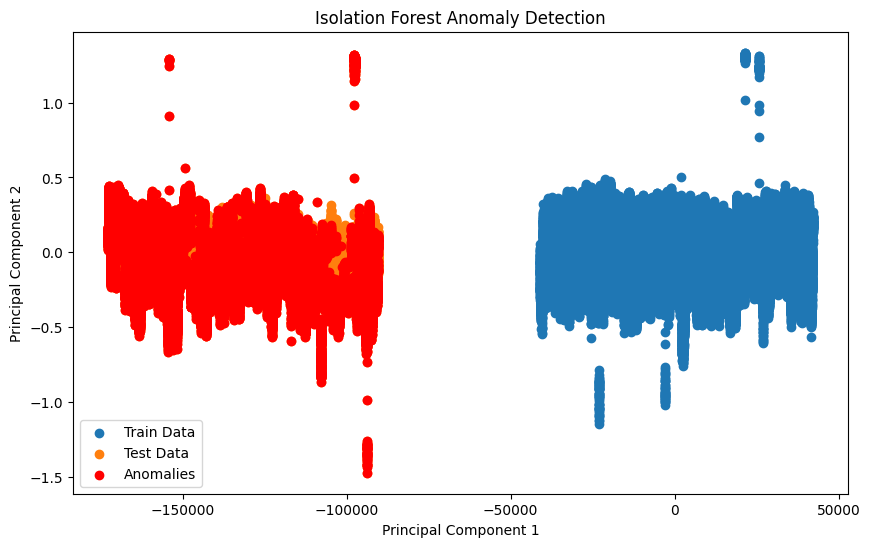

In [ ]:
# Visualization for Isolation Forest
plt.figure(figsize=(10, 6))
plt.scatter(train_pca[:, 0], train_pca[:, 1], label='Train Data')
plt.scatter(test_pca[:, 0], test_pca[:, 1], label='Test Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Isolation Forest Anomaly Detection')
plt.legend()

# Highlight anomalies in the test data detected by Isolation Forest
plt.scatter(test_pca[test_pred_forest == -1][:, 0], test_pca[test_pred_forest == -1][:, 1], color='red', label='Anomalies')
plt.legend()

plt.show()


# **Local Outlier Factor**

In [ ]:
# Task 4: Local Outlier Factor
def anomaly_detection_lof(train_data, test_data):
    lof = LocalOutlierFactor()
    test_pred = lof.fit_predict(test_data)
    return test_pred

In [ ]:
test_pred_lof = anomaly_detection_lof(train_data, test_data)

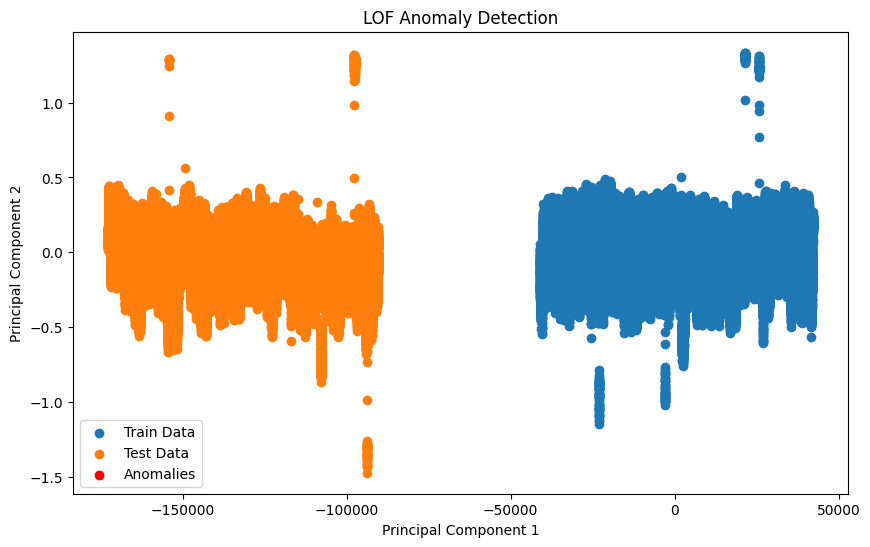

In [ ]:
# Visualization for Local Outlier Factor (LOF)
plt.figure(figsize=(10, 6))
plt.scatter(train_pca[:, 0], train_pca[:, 1], label='Train Data')
plt.scatter(test_pca[:, 0], test_pca[:, 1], label='Test Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('LOF Anomaly Detection')
plt.legend()

# Highlight anomalies in the test data detected by LOF
plt.scatter(test_pca[test_pred_lof == -1][:, 0], test_pca[test_pred_lof == -1][:, 1], color='red', label='Anomalies')
plt.legend()

plt.show()


# **DBSCAN**

In [ ]:

# Task 5: DBSCAN
def anomaly_detection_dbscan(train_data, test_data):
    dbscan = DBSCAN()
    dbscan.fit(train_data)
    test_pred = dbscan.fit_predict(test_data)
    return test_pred

In [ ]:
test_pred_dbscan = anomaly_detection_dbscan(train_data, test_data)

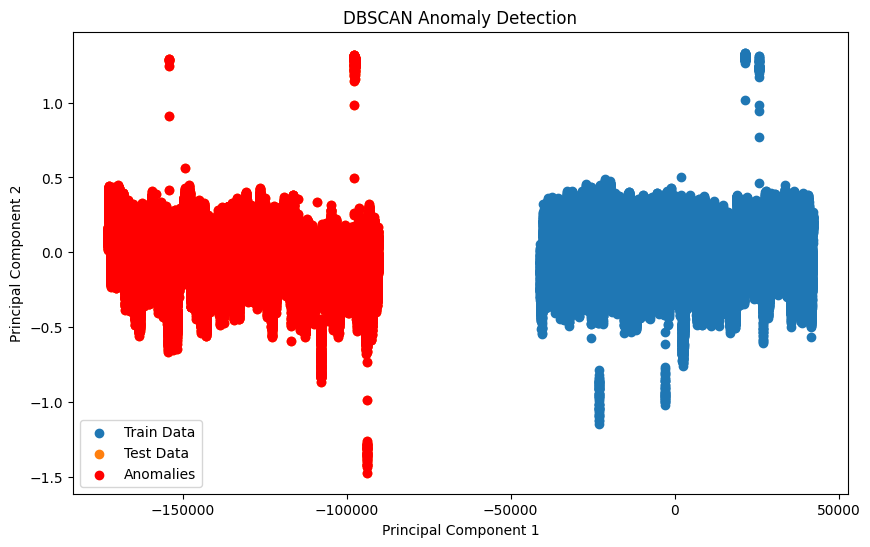

In [ ]:
# Visualization for DBSCAN
plt.figure(figsize=(10, 6))
plt.scatter(train_pca[:, 0], train_pca[:, 1], label='Train Data')
plt.scatter(test_pca[:, 0], test_pca[:, 1], label='Test Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('DBSCAN Anomaly Detection')
plt.legend()

# Highlight anomalies in the test data detected by DBSCAN
plt.scatter(test_pca[test_pred_dbscan == -1][:, 0], test_pca[test_pred_dbscan == -1][:, 1], color='red', label='Anomalies')
plt.legend()

plt.show()


# **DTW**

In [ ]:
from dtw import dtw
import numpy as np

def anomaly_detection_dtw(train_data, test_data):
    anomalies = []
    for test_sequence in test_data:
        min_dist = float('inf')
        for train_sequence in train_data:
            dist, _, _, _ = dtw(test_sequence, train_sequence, dist=lambda x, y: np.linalg.norm(x - y))
            if dist < min_dist:
                min_dist = dist
        anomalies.append(min_dist)
    return anomalies


In [ ]:
anomaly_scores = anomaly_detection_dtw(train_data, test_data)
print("Anomaly scores:", anomaly_scores)

TypeError: object of type 'numpy.float64' has no len()

In [ ]:
# Perform anomaly detection using DTW
anomaly_scores = anomaly_detection_dtw(train_data, test_data)

# Plot the anomaly scores
plt.figure(figsize=(10, 6))
plt.plot(anomaly_scores, label='DTW Anomaly Score')
plt.xlabel('Test Data Index')
plt.ylabel('Anomaly Score')
plt.title('Comparison of DTW Anomaly Scores between Train and Test Data')
plt.legend()
plt.show()

# **Shesd**

In [ ]:
def anomaly_detection_shesd(train_data, test_data, period=24, alpha=0.05, max_anomalies=None):
    # Decompose the time series
    decomposition = seasonal_decompose(train_data, period=period)
    seasonal = decomposition.seasonal
    resid = decomposition.resid

    # Calculate the residuals for the test data
    test_decomposition = seasonal_decompose(test_data, period=period)
    test_residuals = test_decomposition.resid

    # Calculate the anomalies using S-H-ESD
    n = len(test_residuals)
    anomalies = []

    for i in range(n):
        # Calculate the mean and standard deviation of the residuals up to time i
        mean_residuals = np.mean(resid[:i+1])
        std_residuals = np.std(resid[:i+1])

        # Calculate the test statistic
        test_statistic = (test_residuals[i] - mean_residuals) / std_residuals

        # Calculate the critical value
        critical_value = t.ppf(1 - alpha / (2 * (n - i)), n - i - 1)

        # Check if the test statistic exceeds the critical value
        if np.abs(test_statistic) > critical_value:
            anomalies.append(i)

        # Stop if the maximum number of anomalies is reached
        if max_anomalies and len(anomalies) >= max_anomalies:
            break

    return anomalies



In [ ]:
# Load the data
train_data = pd.read_csv("train.csv")["timestamp_(min)"].values
test_data = pd.read_csv("test.csv")["timestamp_(min)"].values

# Perform anomaly detection using S-H-ESD
anomalies_shesd = anomaly_detection_shesd(train_data, test_data)

print("Detected anomalies at indices:", anomalies_shesd)

Detected anomalies at indices: []


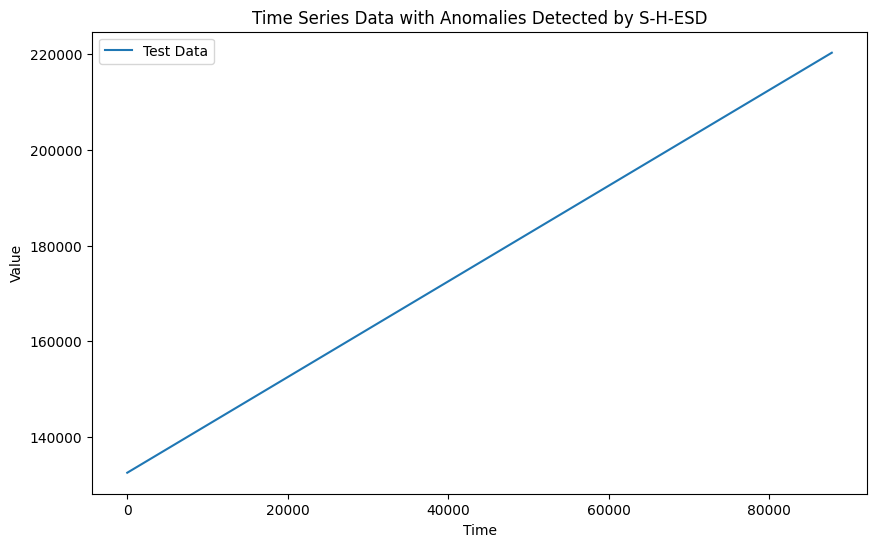

In [ ]:
# Plot the time series data
plt.figure(figsize=(10, 6))
plt.plot(test_data, label='Test Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Time Series Data with Anomalies Detected by S-H-ESD')

# Highlight the detected anomalies
for anomaly_index in anomalies_shesd:
    plt.scatter(anomaly_index, test_data[anomaly_index], color='red', label='Anomaly')

plt.legend()
plt.show()

# **TASK 4**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# Step 1: Data Preprocessing
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

# Drop rows with NaN values
train_data.dropna(inplace=True)
test_data.dropna(inplace=True)

# Assuming the target column is not included in the training data
X_train = train_data.drop(columns=["timestamp_(min)"])  # Remove timestamp column
X_test = test_data.drop(columns=["timestamp_(min)"])

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 2: PCA Model
pca = PCA(n_components=0.95)  # Retain 95% of variance
pca.fit(X_train_scaled)

# Step 3: Anomaly Detection
train_reconstructed = pca.inverse_transform(pca.transform(X_train_scaled))
test_reconstructed = pca.inverse_transform(pca.transform(X_test_scaled))

train_mse = np.mean(np.square(X_train_scaled - train_reconstructed), axis=1)
test_mse = np.mean(np.square(X_test_scaled - test_reconstructed), axis=1)

# Step 4: Threshold Selection (e.g., using statistical methods or domain knowledge)

# Step 5: Evaluate Performance
# Assuming you have labels for the test data (test_label.csv)
test_labels = pd.read_csv("test_label.csv")["label"]

# Determine anomalies based on threshold
threshold = 0.001 # Set your threshold here
anomalies = test_mse > threshold

# Calculate metrics
print(classification_report(test_labels, anomalies))

# Step 6: Visualization (Optional)
# Visualize anomalies and reconstruction errors if needed


              precision    recall  f1-score   support

           0       0.00      0.00      0.00     63460
           1       0.28      1.00      0.43     24381

    accuracy                           0.28     87841
   macro avg       0.14      0.50      0.22     87841
weighted avg       0.08      0.28      0.12     87841



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Step 1: Handle missing values
# Option 1: Drop rows with missing values
X_train.dropna(inplace=True)

# Option 2: Impute missing values
# You can use SimpleImputer from sklearn.preprocessing to fill missing values with mean, median, etc.
# Example:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)

# Step 2: Define and Train the Isolation Forest model
model = IsolationForest(n_estimators=100, contamination=0.1)  # Adjust parameters as needed
model.fit(X_train_imputed)

# Step 3: Generate predictions
predictions = model.predict(X_test)
predictions_binary = (predictions == -1).astype(int)  # -1 indicates anomaly, 1 indicates normal

# Step 4: Evaluate performance
print(classification_report(test_labels, predictions_binary))


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.75      0.94      0.83     63460
           1       0.51      0.18      0.26     24381

    accuracy                           0.72     87841
   macro avg       0.63      0.56      0.55     87841
weighted avg       0.68      0.72      0.67     87841



In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.ensemble import IsolationForest
import time

# Step 1: Handle missing values
# Option 1: Drop rows with missing values
X_train.dropna(inplace=True)

# Option 2: Impute missing values
# You can use SimpleImputer from sklearn.preprocessing to fill missing values with mean, median, etc.
# Example:
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)

# Step 2: Define and Train the Isolation Forest model
start_time = time.time()
model = IsolationForest(n_estimators=100, contamination=0.1)  # Adjust parameters as needed
model.fit(X_train_imputed)
train_time = time.time() - start_time

# Step 3: Generate predictions
start_time = time.time()
predictions = model.predict(X_test)
prediction_time = time.time() - start_time
predictions_binary = (predictions == -1).astype(int)  # -1 indicates anomaly, 1 indicates normal

# Step 4: Evaluate performance
f1 = classification_report(test_labels, predictions_binary)
auc = roc_auc_score(test_labels, predictions_binary)

print("Training Time:", train_time)
print("Prediction Time:", prediction_time)
print("F1 Score:", f1)
print("AUC Score:", auc)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(


Training Time: 3.0592174530029297
Prediction Time: 2.5410304069519043
F1 Score:               precision    recall  f1-score   support

           0       0.75      0.92      0.83     63460
           1       0.52      0.22      0.31     24381

    accuracy                           0.73     87841
   macro avg       0.64      0.57      0.57     87841
weighted avg       0.69      0.73      0.69     87841

AUC Score: 0.5715618170121648


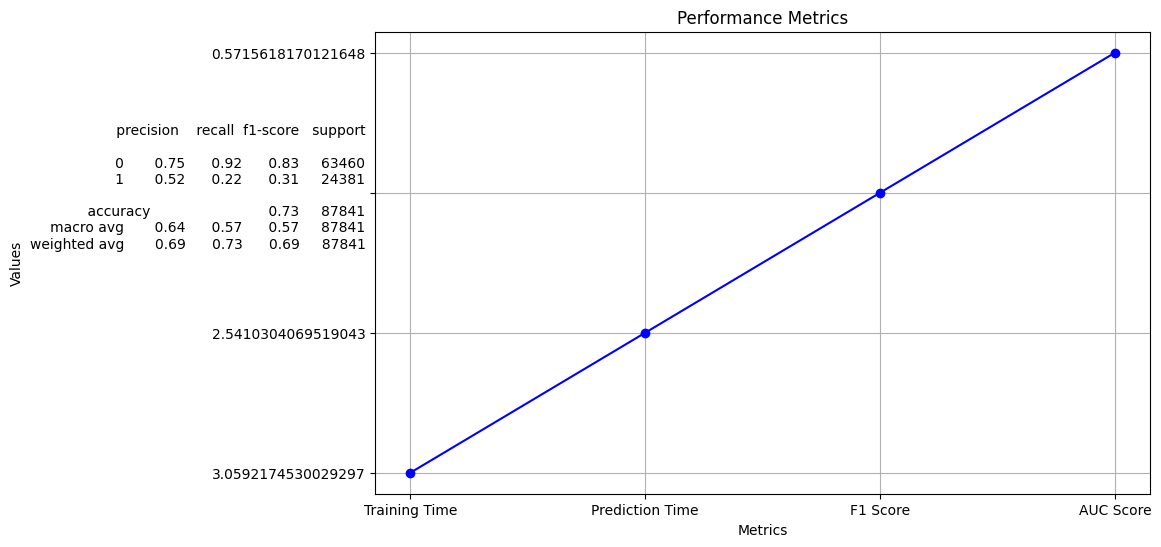

In [ ]:
# Plot
plt.figure(figsize=(10, 6))
plt.plot(metrics, values, marker='o', linestyle='-', color='b')
plt.title('Performance Metrics')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.grid(True)
plt.show()
